# Life expectancy in Southeast Asian countries

##### The data used in this notebook was obtained from https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure. The goal is plot the life expentancy over the year for different countries in SEA. The health expenditure is actually missing from the data.

## Import data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

#### The data came from https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure

In [11]:
df = pd.read_csv('data/life-expectancy-vs-health-expenditure.csv')

## Data Cleaning and Augmentation
#### Rename columns to make it easier to call later on

In [12]:
df = df[['Entity', 'Year', 'Health Expenditure and Financing (per capita) (OECDstat (2017))',
         'Life expectancy at birth, total (years)']]
df.columns = ['Country', 'Year', 'HealthExpenditure', 'LifeExpectancy'] # Select the important columns


In [13]:
df.Country.replace('Timor','East Timor', inplace=True)

#### Select countries that are in Southeast Asia

In [14]:
# southeast asian countries
sea = ['Brunei', 'Cambodia', 'East Timor', 'Indonesia', 'Laos',
        'Malaysia', 'Myanmar', 'Philippines', 'Singapore',
        'Thailand', 'Vietnam'] 

df = df[df.Country.apply(lambda x: x in sea)].reset_index()
df = df[['Country', 'Year', 'LifeExpectancy']]

In [15]:
new_df = pd.read_csv('data\Subnational-Population_csv/Subnational-PopulationData.csv')

In [16]:
new_df = new_df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
           var_name='Year',
           value_name='Population')

In [17]:
new_df['Indicator Code'].unique()

array(['SP.POP.TOTL.ZS', 'SP.POP.TOTL'], dtype=object)

In [18]:
new_df = new_df.pivot_table(
    index=['Country Name', 'Country Code', 'Indicator Name', 'Year'],
    columns='Indicator Code',
    values='Population'
).reset_index()

new_df.head()

Indicator Code,Country Name,Country Code,Indicator Name,Year,SP.POP.TOTL,SP.POP.TOTL.ZS
0,Afghanistan,AFG,Population (% of total),2000,NaN,100.0
1,Afghanistan,AFG,Population (% of total),2001,NaN,100.0
2,Afghanistan,AFG,Population (% of total),2002,NaN,100.0
3,Afghanistan,AFG,Population (% of total),2003,NaN,100.0
4,Afghanistan,AFG,Population (% of total),2004,NaN,100.0


## Visualization

#### Line plot of life expectancy over 1960-2020 for different countries in SEA

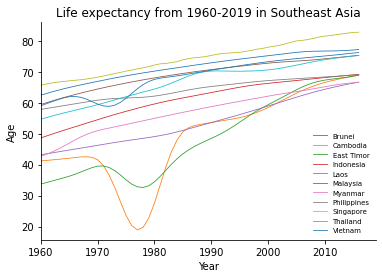

In [19]:
for country in sea:
    data = df.loc[df.Country == country]
    plt.plot(data.Year, data.LifeExpectancy, linewidth=0.8, label=country)

ax = plt.gca()
xticks = np.arange(1960, 2020, step=10)

# labels
ax.set_xlabel('Year')
ax.set_ylabel('Age')

# ticks
ax.set_xticks(xticks)

# legend
ax.legend(fontsize='x-small', loc=4, frameon=False)

# axis limits
ax.set_xlim(1960, 2019)

# hide the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# show grid
# ax.grid(linewidth=0.3)

# set title
ax.set_title('Life expectancy from 1960-2019 in Southeast Asia')

# plt.savefig('life_expectancy.png', dpi=200)
plt.show()


#### Bar plot of mean life expectancy

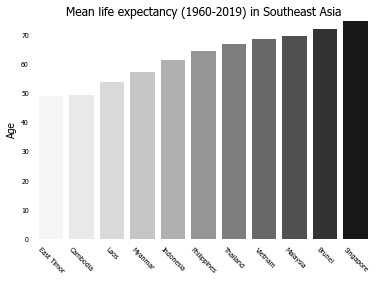

In [20]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

life_expectancy = df.groupby('Country').mean()['LifeExpectancy'].sort_values(ascending=True)

fig, ax2 = plt.subplots(figsize=(6,4))

# horizontal barplot
barplot = sns.barplot(x=life_expectancy.index, y=life_expectancy, palette='Greys', edgecolor='None')

# remove ticks
ax2.tick_params(axis="x", which = "both", top=False, bottom=False, labelrotation=-45, labelsize=7)
ax2.tick_params(axis="y", which = "both", left=False, right=False, labelsize=7)
# ax2.set_xticklabels(rotation='vertical')

# hide all spines
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# limit y axis
ax2.set_ylim(top=life_expectancy.max())

# set label
ax2.set_ylabel('Age')
ax2.set_xlabel(None)

# set title
ax2.set_title('Mean life expectancy (1960-2019) in Southeast Asia')

plt.savefig('lifeexpectancy_bar.png', dpi=200)
plt.show()

In [ ]:
def get_multi_line_title(title:str, subtitle:str):
    return f"{title}<br><sub>{subtitle}</sub>"

In [ ]:
get_multi_line_title("People Vaccinated", "Individuals who received the first dose of the vaccine")

#### Define a function that will automatically plots that data


In [ ]:
def visualize(xcolumn, ycolumn):

    for country in sea:
        data = df.loc[df.Country == country]

        plt.plot(data[xcolumn], data[ycolumn], label=country)
       
    xticks = np.arange(int(df.Year.min()), int(df.Year.max()), 10)
    
    # labels
    plt.xlabel('Year')
    plt.ylabel('Age')
    
    # ticks
    plt.xticks(xticks, rotation='vertical')
    
    # legend
    plt.legend(4)    
    
    plt.show()

In [ ]:
visualize('Year', 'LifeExpectancy')

In [ ]:
def visualize_column(data, y_label, color):
    
    fig, ax1 = plt.subplots()

    ax1.plot(df.Year, data, color=color) 
    
    # set axis labels for ax1
    ax1.set_xlabel('Year')
    ax1.set_ylabel(y_label)
    # ax1.set_xticklabels(data.index) # set ticks 
    plt.show()


In [ ]:
visualize_column(data=df.LifeExpectancy, y_label='Life Expectancy', color='blue')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax1 = plt.subplots()

ax1.plot(df['Year'], df['HealthExpenditure'], color='blue') # %gpd spending per capita

# set axis labels for ax1
ax1.set_xlabel('Year')
ax1.set_ylabel('Healthcare expenditure ($)', color='blue')
# ax1.set_xticklabels(data.index) # set ticks 

ax2 = plt.twinx() # ax2 share same x-axis with ax1

ax2.plot(df['Year'], df['LifeExpectancy'], color='red') # life expectancy
ax2.set_ylabel('Life expectancy', color='red') # set axis label for ax2


plt.show()
